## COMP5712M: Programming for Data Science

## Group project: Data Analysis Project


# _Project Title_ - Comparative Analysis of Weekly Excess Mortality Across Countries


_Names and emails of our group members:_

* Aditya Pathanjali Sastry Oruganti, plfq0573@leeds.ac.uk
* Hamna Farooq, slnw0783@leeds.ac.uk
* Kishore Rajavel Kohilavani, ndxl0490@leeds.ac.uk
* Surya Prasath Sivakumar Karthika, mjgw0473@leeds.ac.uk

#Project Plan
##The Data (10 marks)

Our dataset in the current project is All Weekly Excess Deaths which was derived first on the Our World in Data (OWID) COVID-19 mortality repository. It includes mortality statistics of various countries and regions on a weekly basis, and the data spans a few years prior to and after the COVID-19 pandemic. The fields in the dataset are the country name, ISO codes, population, week number, year, reported deaths, expected deaths, excess deaths and excess deaths per 100,000 people.

The data is high quality and sourced from kaggle and reputable news instituitions like The New York Times and The Economist that compile government and public-health sources, and is thus accurate and reliable to use for the purpose of analysis.

The data consists of more than 5,000 rows containing the weekly mortality data of 46 countries over a common period of approximately 104 weeks, covering January 2020 through December 2021. For each country it contains data for how many people died, the expected deaths (based off historical averages), how many deaths exceeded the expected deaths (excess deaths), the number of deaths that occured due to Covid, the number of deaths that occured due to other reasons (Non-Covid Deaths), the population at the time, and the time period for for which the data is reported. The dataset also reports the normalized mortality indicators per 100,000 people, which include; Covid deaths per 100,000 people (covid_deaths_per_100k), total deaths per 100,000 people (total_deaths_per_100k), and excess deaths per 100,000 people (excess_deaths_per_100k), this helps draw a fair comparision between countries with varying populations to analyze the impact of covid on their population. There is also a column that represents the percentage change between excess deaths and expected deaths (excess_deaths_pct_change), compared to a normal year.

The dataset can be used to draw insights regarding the mortality trends of each country throughout the entire period, the bell-curve of the covid wave, the impact lockdown and other strategies had on overall populations, and can help us pin around what point in time was covid at an all time high globally and around what period of time did it subside. Using descriptive analysis and predictive modelling, we can visulaize the long-term and short-term spikes aswell as the long-term trends,seasonal dynamics, and outliers.

The rich, comprehensive and well-organized nature of the data make it appropriate to conduct exploratory data analysis, perform visualisation, and conduct machine-learning to predict the trends in excess mortality across nations.

###Dataset Source:
https://www.kaggle.com/datasets/dhruvildave/covid19-deaths-dataset

##Project Aim and Objectives (5 marks)

To generate clear and elaborate representations of the data that provide visual insights into weekly excess mortality rates across countries, expanding on cumulative and weekly effects, the recorded trends across this period of time and a comparision of the official covid deaths to the expected covid deaths. The analysis made and insights extracted are all presented in a precise report for clearer presentation of this data.

##High-Level Objective(s):
1. *Data cleaning and preparation*: Clean the dataset, look for and fix any missing values or inconsistencies in the data.
2. *Descriptive & comparative analysis*: Calculate per-country aggregates, ranks and key summary.Compare excess COVID deaths with reported COVID deaths.
3. *Visualization & storytelling*: Develop a visualization of information (time series, bar charts, scatter plots) to present findings.
4. *Clustering and regressions*: Classify the data, generate predictions from algorithms like K-Means clustering and RandomForestRegressor.

##Specific Objective(s)

* *Objective 1*: Clean, preprocess and structure the dataset for duplicated,and/or missing data types to be further analyzed.

* *Objective 2*: Conduct an exploratory data analysis (EDA) with yearly trends, country-comparison and time-series visualisations of excess deaths and excess deaths per 100k population.

* *Objective 3*: Visualize information using time-plots, bar graphs, histograms and scatterplots.

* *Objective 4*: Construct predictive regression models (Decision Tree and Random Forest) that predict excess deaths per 100k. Judge the performance of a model, visualise decision trees and KMeans Clustering, and create insights based on feature input and predictive behaviour.

##System Design (5 marks)

This infographic system design describes a well-defined workflow pipeline that allows our data to pass through the different processes of analysis and modelling to generate an accurate output.


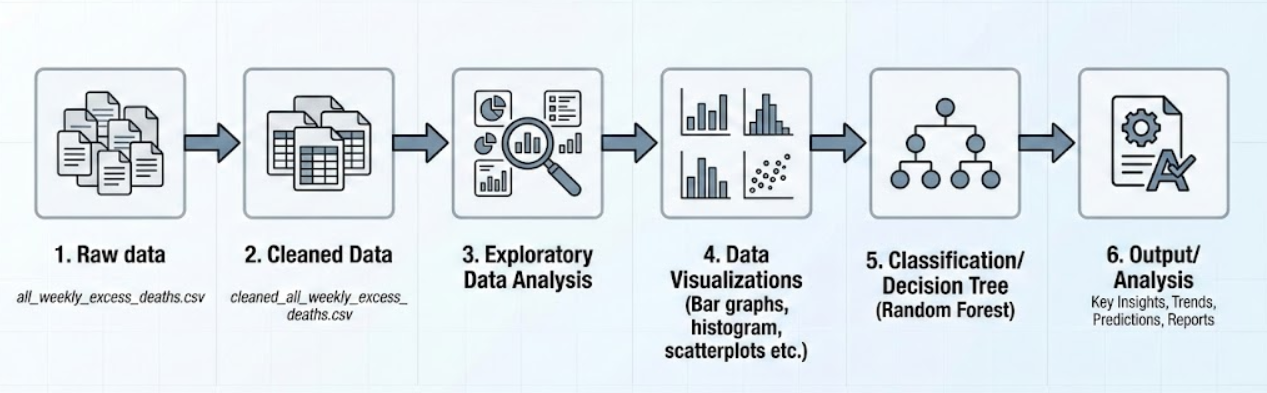



###Architecture

Our system is constructed based on a simple data-analysis and modelling pipeline, and it is entirely written in Python using the libraries Pandas, numpy, matplotlib, seaborn and, Scikit-learn. Our initial steps involves loading and cleaning the dataset and it is then passed through exploratory analysis modules to derive meaningful insights. The trained and tested models (Decision Tree and Random Forest Regressor) are based on the cleansed data which guarantees predictive dependence. Lastly, we create visualisations like time-series plot, bar charts, decision-tree diagram to assist in interpretation and decision-making. This pipeline ensures clarity, reproducibility and ease of execution and enables us to analyse trends in a systematic manner and structure them into interpretable forecasting models.

###Processing Algorithms and Modules
Modules used for processing:

 * _pandas_: tabular datasets can be loaded, cleaned, and altered using pandas.
 * _numpy_: Used to perform numerical operations and array structures for mathematical computations.
 * _matplotlib.pyplot_: Plots and visualizations like line charts, histograms, and bar graphs can be created using matplotlib.pyplot.

* _train_test_split (sklearn.model_selection)_ - Splits the dataset into training and testing sets for model evaluation.
* _DecisionTreeRegressor_ - Builds a tree-based regression model to predict excess deaths per 100k.
plot_tree - Visualises the structure of a fitted decision tree.
* _RandomForestRegressor_ - Creates an ensemble of decision trees to improve prediction accuracy and stability.
* _KMeans_ - Performs unsupervised clustering to group countries based on mortality features.
* _KNeighborsClassifier_ - Classifies data points based on the nearest labelled neighbours in feature space.
* _silhouette_score_ - It evaluates how well the clusters are separated and cohesive.
* _accuracy_score_ - Measures the accuracy of classification predictions.

# Program Code (15 marks)

In [1]:
#Importing all the packages before-hand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
#--------data cleaning---------

def load_the_dataset():
    return pd.read_csv("/content/all_weekly_excess_deaths.csv")

df=load_the_dataset()
df=df.drop_duplicates()

This code block handles missing values and enforces correct data types for numeric operations.
It standardizes and renames DataFrame columns for consistency and it also computes mortality-specific metrics (e.g., excess deaths,
non-COVID deaths, per-100k rates).

In [3]:
#This function is used to clean the numerical data in the dataset
def numeric_cleaning(df):

    # loop through col and converting date columns to datetime format,
    #coerce invalid values to NaT
    for col in ["start_date","end_date"]:
        if col in df.columns:
            df[col]=pd.to_datetime(df[col],errors='coerce')

    df=df.dropna(subset=[c for c in ("start_date", "end_date") if c in df.columns])

    # Identify numeric columns to clean
    num_cols = [c for c in ["population","total_deaths","covid_deaths","expected_deaths",
            "excess_deaths","non_covid_deaths"] if c in df.columns]

    # looping through col and convert numeric columns to numeric type, coerce errors, and set negative values to NaN
    for col in num_cols:
        df[col]=pd.to_numeric(df[col],errors='coerce')
        df.loc[df[col]<0,col]=np.nan

    if num_cols:
        df[num_cols]=df[num_cols].ffill().bfill()

    #This block is ensuring 'year' and 'week' are integers
    if "year" in df.columns:
        df["year"]=pd.to_numeric(df["year"],errors='coerce').astype("Int64")
    if "week" in df.columns:
        df["week"]=pd.to_numeric(df["week"],errors='coerce').astype("Int64")
        df = df[df["week"].between(1,53)]

    return df

The function def recalculate_metrics standardizes and renames DataFrame columns for consistency. It exports processed data or trained models to
disk with another file 'cleaned_all_weekly_excess_deaths.csv'.

In [4]:
def recalculate_metrics(df):
    # ensure required columns exist before computing
    if set(["total_deaths","covid_deaths"]).issubset(df.columns):
        df["non_covid_deaths"]=df["total_deaths"] - df["covid_deaths"]
    if set(["total_deaths","expected_deaths"]).issubset(df.columns):
        df["excess_deaths"]=df["total_deaths"] - df["expected_deaths"]
    if set(["covid_deaths","population"]).issubset(df.columns):
        df["covid_deaths_per_100k"]=(df["covid_deaths"]/df["population"])*100000
    if set(["excess_deaths","population"]).issubset(df.columns):
        df["excess_deaths_per_100k"]=(df["excess_deaths"]/df["population"])*100000
    if set(["excess_deaths","expected_deaths"]).issubset(df.columns):
        df["excess_deaths_pct_change"]=df["excess_deaths"]/df["expected_deaths"].replace({0: np.nan})

    # Sort by country, year, and week if these columns exist
    sort_cols=[c for c in ["country","year","week"] if c in df.columns]
    if sort_cols:
        df = df.sort_values(sort_cols).reset_index(drop=True)

    return df

#Using the numeric_cleaning function defined in the above block
df = numeric_cleaning(df)
df = recalculate_metrics(df)

#The processed data is saved to the output path
output_path = "/content/cleaned_all_weekly_excess_deaths.csv"
df.to_csv(output_path, index=False)

print("Saved cleaned file to:", output_path)

Saved cleaned file to: /content/cleaned_all_weekly_excess_deaths.csv


In [5]:
#Once the dataset is cleaned, we're reloading it to avoid confusion
df=pd.read_csv(output_path)
print(f"\nRe-loaded CLEANED file: {len(df)} rows × {len(df.columns)} cols")

print("\n== Quick EDA ==")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
#Checking if the file loaded correctly
print("\nFirst 5 rows:")
print(df.head().to_string(index=False))


Re-loaded CLEANED file: 5770 rows × 17 cols

== Quick EDA ==
Shape: (5770, 17)
Columns: ['country', 'region', 'region_code', 'start_date', 'end_date', 'days', 'year', 'week', 'population', 'total_deaths', 'covid_deaths', 'expected_deaths', 'excess_deaths', 'non_covid_deaths', 'covid_deaths_per_100k', 'excess_deaths_per_100k', 'excess_deaths_pct_change']

First 5 rows:
  country    region  region_code start_date   end_date  days  year  week  population  total_deaths  covid_deaths  expected_deaths  excess_deaths  non_covid_deaths  covid_deaths_per_100k  excess_deaths_per_100k  excess_deaths_pct_change
Australia Australia            0 2019-12-30 2020-01-05     7  2020     1  25921089.0        2926.0           0.0      2965.372893     -39.372893            2926.0                    0.0               -0.151895                 -0.013278
Australia Australia            0 2020-01-06 2020-01-12     7  2020     2  25921089.0        2902.0           0.0      2956.539560     -54.539560            

Retrieving Top countries by row count

In [6]:
if "country" in df.columns:
    print("\nTop countries by row count:")
    print(df["country"].value_counts().head(8).to_string())

num = df.select_dtypes(include=[np.number])


Top countries by row count:
country
South Africa    134
Ecuador         133
Colombia        132
Denmark         132
Iran            132
Chile           132
Peru            132
Netherlands     132


This block selects available death-related columns, aggregates them by country, sorts by the primary metric, and prints the top 10 countries by their summed totals.

In [7]:
#Condition to check if there are any numeric columns selected
if not num.empty:
    print("\nNumeric summary (selected):")
    desc=num.describe().transpose().round(3)
    print(desc.loc[:, ["count","mean","std","min","50%","max"]])

#condition to check if there are atleast 2 numeric columns, then calculate correlations
if num.shape[1]>=2:
    corr=num.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
    print("\nTop correlations (abs, excluding 1.0):")
    print(corr[(corr< 1)].head(12).round(3).to_string())


Numeric summary (selected):
                           count          mean           std         min  \
region_code               5770.0  0.000000e+00  0.000000e+00       0.000   
days                      5770.0  7.000000e+00  0.000000e+00       7.000   
year                      5770.0  2.020750e+03  7.300000e-01    2020.000   
week                      5770.0  2.422100e+01  1.508900e+01       1.000   
population                5770.0  3.120102e+07  5.401340e+07  370335.000   
total_deaths              5770.0  5.697674e+03  1.051077e+04      28.000   
covid_deaths              5770.0  5.861020e+02  1.653625e+03       0.000   
expected_deaths           5770.0  4.925624e+03  8.940263e+03      36.959   
excess_deaths             5770.0  7.720510e+02  2.334269e+03   -3884.712   
non_covid_deaths          5770.0  5.111572e+03  9.220807e+03      28.000   
covid_deaths_per_100k     5770.0  1.779000e+00  2.629000e+00       0.000   
excess_deaths_per_100k    5770.0  2.341000e+00  4.210000e+0

Repeating the same selection by grouping, sorting and printing of the top 10 countries by summed death totals.

In [8]:
# agg_cols store the columns that exist in the dataframe
agg_cols = [c for c in ("total_deaths","covid_deaths","expected_deaths","excess_deaths") if c in df.columns]

if agg_cols and "country" in df.columns:
    # agg_country is grouping data by country & sum the selected columns, sort by the first column (total_deaths), and take top 10
    agg_country=df.groupby("country")[agg_cols].sum().sort_values(agg_cols[0],ascending=False).head(10)
    print("\nTop 10 countries by totals:")
    print(agg_country.round(1).to_string())



Top 10 countries by totals:
               total_deaths  covid_deaths  expected_deaths  excess_deaths
country                                                                  
United States     8407409.0     1011492.0        7247523.5      1159885.5
Germany           2529149.0      141316.0        2403538.6       125610.4
Mexico            2503250.0      317420.0        1844996.7       658253.3
Italy             1707936.0      163643.0        1504692.0       203244.0
Britain           1691666.0      176528.0        1532678.9       158987.1
South Africa      1614666.0      101620.0        1344275.1       270390.9
France            1599319.0      149205.0        1491361.6       107957.4
Iran              1260978.7      140838.0         988977.4       272001.3
Poland            1227358.0      116417.0        1045582.4       181775.6
Spain             1139522.0      107261.0        1021966.7       117555.3


This condition prints when year is present, groups the selected death columns by year, sums them to produce yearly totals, and prints the aggregated table.

In [9]:
if agg_cols and "year" in df.columns:
     # agg_year is grouping data by year & sum the specified columns that exist in the dataframe
    agg_year=df.groupby("year")[[c for c in agg_cols if c in df.columns]].sum().sort_index()
    print("\nAggregates by year:")
    print(agg_year.round(1).to_string())


Aggregates by year:
      total_deaths  covid_deaths  expected_deaths  excess_deaths
year                                                            
2020    13508662.8     1219162.0       11697270.6      1811392.2
2021    13670896.9     1654330.0       11496637.3      2174259.6
2022     5696021.5      508319.0        5226940.8       469080.7


###Visualizations


#####Histogram:
This histogram respresents a combined visual of the distribution of excess mortality rates of all countries per 100k people across all weeks. Where the X-axis represents the number of deaths per 100k people and the Y-axis represents the amount of weekly recorded number of deaths that fall within that range.

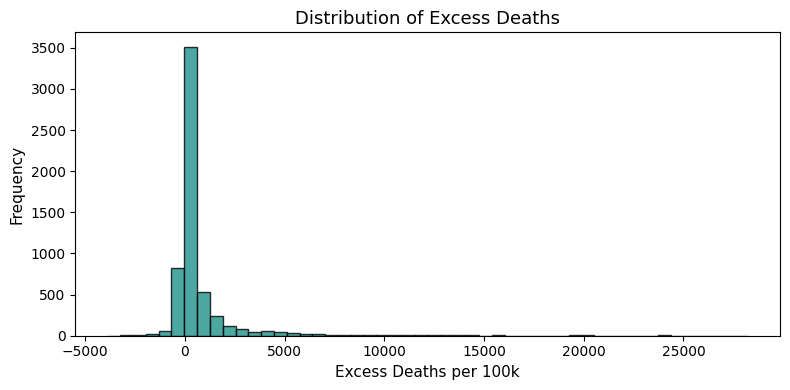

In [10]:
plt.figure(figsize=(8,4))

# Using a smooth Seaborn color palette
color = sns.color_palette("viridis", 1)[0]

# Plot histogram
plt.hist(df["excess_deaths"].dropna(), bins=50, color=color, edgecolor="black", alpha=0.8)

# Labels and title
plt.title("Distribution of Excess Deaths", fontsize=13)
plt.xlabel("Excess Deaths per 100k", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

plt.tight_layout()
plt.show()


From the graph above it can be derived that the weekly excess mortality rate was generally low to moderate as is imminent by the spike near zero. However certain covid waves did result in surges.

#####Time-series plot:
Following is the code and the output for a time-series plot that displays the weekly excess mortality rates for the top 8 countries with the highest mortality rates, namely; USA, Mexico, Iran, South Africa, Italy, Peru, Poland, Columbia.
The X-axis represents the weeks, and the Y-axis represents the Excess deaths per 100k people.


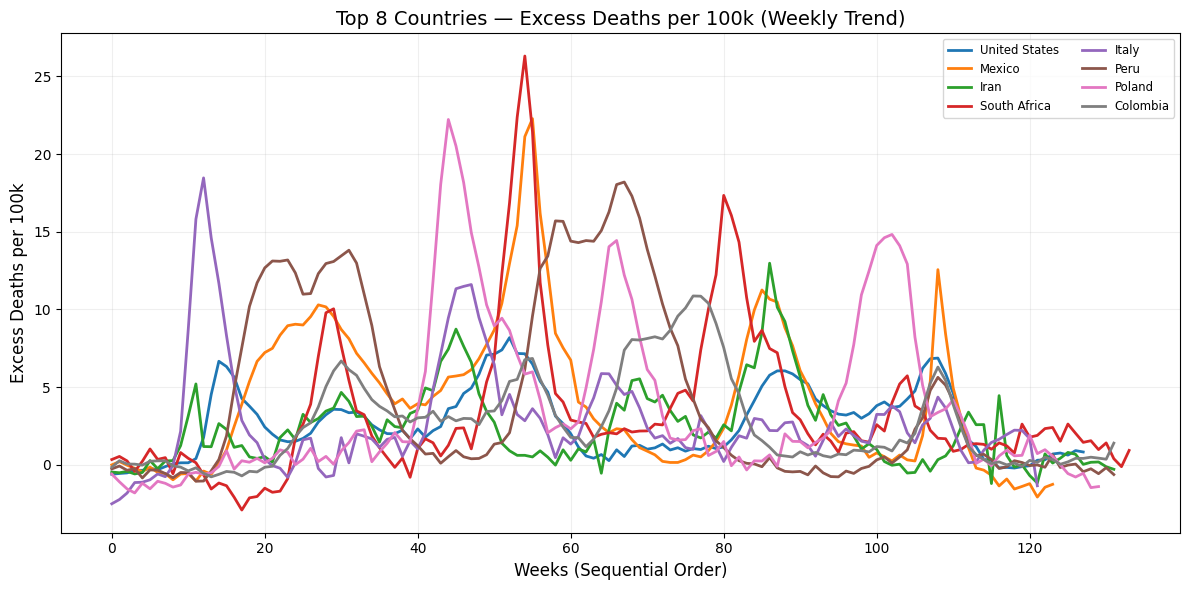

In [11]:
#This condition checks if required columns exist in the dataframe
if "excess_deaths_per_100k" in df.columns and "country" in df.columns:
    # Grouping and identifying top 8 countries by total excess deaths
    top_countries = (
        df.groupby("country")["excess_deaths"]
        .sum()
        .sort_values(ascending=False)
        .head(8)
        .index
        .tolist()
    )

    plt.figure(figsize=(12,6))

    # For each top country, plotting weekly excess deaths per 100k
    for c in top_countries:
        sub = df[df["country"] == c].sort_values(["year", "week"])
        plt.plot(
            sub["excess_deaths_per_100k"].fillna(0).values,
            label=c,
            linewidth=2
        )
    #Title and axis labels
    plt.title("Top 8 Countries — Excess Deaths per 100k (Weekly Trend)", fontsize=14)
    plt.xlabel("Weeks (Sequential Order)", fontsize=12)
    plt.ylabel("Excess Deaths per 100k", fontsize=12)

    plt.legend(ncol=2, fontsize="small")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


Some insights that can be drawn from this multi-line time series plot are as follows;
Every country goes through multiple surges in excess deaths periodically.
Peru and Mexico have some of the highest peaks in the graph throughout.
Italy and Iran show early signs of being highly impacted by Covid.
Columbia, Poland, and South Africa ocassionally show distinct extreme surges in excess deaths.

#####Bar Chart:
Following is the code and output for a bar chart represnting the excess deaths globally during the period of 2019-2022. The X-axis represents the years, while the Y-axis represents the total number of excess deaths per 100k people.

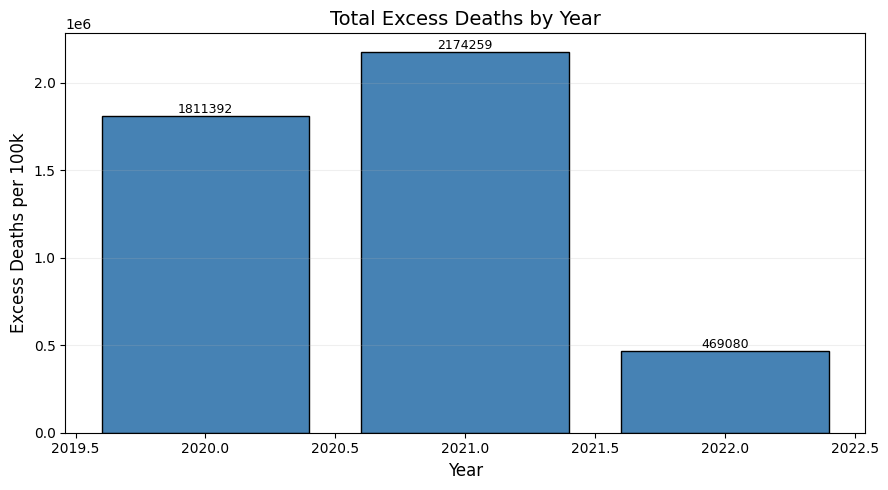

In [12]:
if "year" in df.columns:
    yearly = df.groupby("year")["excess_deaths"].sum()

    plt.figure(figsize=(9,5))
    plt.bar(yearly.index, yearly.values, color="steelblue", edgecolor="black")

    plt.title("Total Excess Deaths by Year", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Excess Deaths per 100k", fontsize=12)

    # Adding value labels on top of bars
    for x, y in zip(yearly.index, yearly.values):
        plt.text(x, y, f"{int(y)}", ha="center", va="bottom", fontsize=9)

    plt.grid(axis="y", alpha=0.2)
    plt.tight_layout()
    plt.show()

As is visible through the graph, during the year 2020 the total number of excess deaths was around 1.8 million, 2.17 million during 2021 and witness a steep decline at around 460k during the year 2022.

In [13]:
df["week"]=pd.to_datetime(df["week"])
metric= "excess_deaths_per_100k"

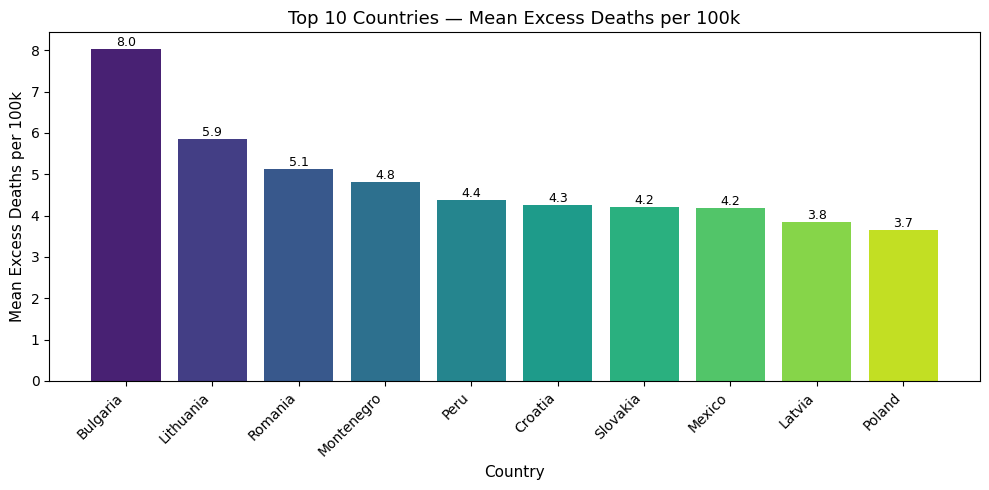

In [14]:
#Top-10 mean metric bar chart
top10 = (
    df.groupby("country")[metric]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Choosing a nice color palette for better visualization
colors = sns.color_palette("viridis", len(top10))

plt.figure(figsize=(10, 5))
bars = plt.bar(top10.index, top10.values, color=colors)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean Excess Deaths per 100k", fontsize=11)
plt.xlabel("Country", fontsize=11)
plt.title("Top 10 Countries — Mean Excess Deaths per 100k", fontsize=13)

plt.tight_layout()
plt.show()


Plotting a bubble scatter of mean COVID vs. mean excess deaths per 100k (bubble size ∝ population, color = excess−COVID), fitting a linear trend, and annotating the greatest residual outlier nations are all done after forcing important columns to be numeric and aggregating country-level means/medians.

In [15]:
# This block ensures that the columns used in calculations are numeric.
#Any invalid entries (like strings) will become NaN.
df["covid_deaths_per_100k"] = pd.to_numeric(df.get("covid_deaths_per_100k"), errors="coerce")
df["excess_deaths_per_100k"] = pd.to_numeric(df.get("excess_deaths_per_100k"), errors="coerce")
df["population"] = pd.to_numeric(df.get("population"), errors="coerce")

#Aggregate data by country: mean for deaths and median for population
agg = df.groupby("country").agg({
    "covid_deaths_per_100k": "mean",
    "excess_deaths_per_100k": "mean",
    "population": "median"
}).dropna().reset_index()


#For plotting, we're extracting the numpy arrays
item = agg["covid_deaths_per_100k"].values
temp = agg["excess_deaths_per_100k"].values
pop = agg["population"].values

In [16]:
# Computiung bubble size and color based on population and 800 refers to the max size
color = (temp - item)
size = (pop / pop.max()) * 800

# Using polyfit to fit a linear regression between COVID and excess deaths
coef = np.polyfit(item, temp, 1)
poly = np.poly1d(coef)
y_fit = poly(item)

# Computing Pearson correlation coefficient
r, p = pearsonr(item, temp)

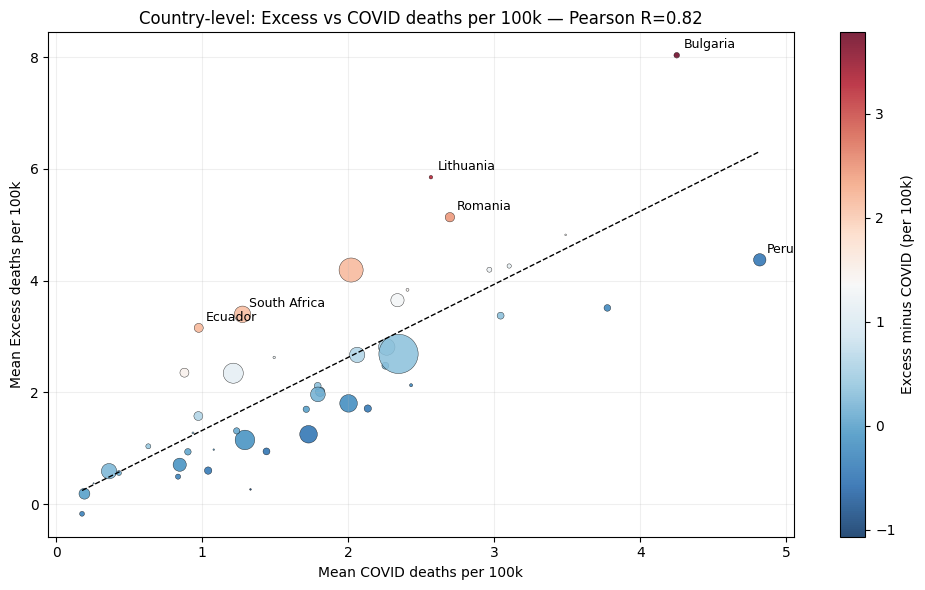

In [17]:
# Creating the scatter plot
plt.figure(figsize=(10,6))
sc = plt.scatter(item, temp, s=size, c=color, cmap="RdBu_r", alpha=0.85, edgecolor="k", linewidth=0.3)
plt.plot(np.linspace(item.min(), item.max(), 100), poly(np.linspace(item.min(), item.max(), 100)), color="black", linestyle="--", linewidth=1)
cbar = plt.colorbar(sc)
cbar.set_label("Excess minus COVID (per 100k)")

# Add axis labels and title with Pearson R
plt.xlabel("Mean COVID deaths per 100k")
plt.ylabel("Mean Excess deaths per 100k")
plt.title(f"Country-level: Excess vs COVID deaths per 100k — Pearson R={r:.2f}")

#computing the residuals and annotating the top 6 countries with highest deviation from linear fit
residuals = np.abs(temp - y_fit)
top_idx = np.argsort(residuals)[-6:]
for idx in top_idx:
    plt.annotate(agg.loc[idx, "country"], (item[idx], temp[idx]),
                 textcoords="offset points", xytext=(5,5), ha="left", fontsize=9)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

####DecisionTreeRegressor

In [18]:
def load_csv():
    df=pd.read_csv("cleaned_all_weekly_excess_deaths.csv")
    df["week"]=pd.to_datetime(df["week"])
    df["week_num"]=df["week"].map(lambda x: x.toordinal())
    return df

In [19]:
def get_features(df):
    return [
        "week_num",
        "covid_deaths_per_100k",
        "total_deaths",
        "population",
    ]

'train_model' separates the data, prepares the feature and target variables, then trains two models: a limited-depth DecisionTreeRegressor for visualization and a RandomForestRegressor for precise predictions.  It provides the chosen feature list for additional analysis, the train/test splits, and both trained models.

In [20]:
#This function helps us to train the models on the dataset
def train_models(df):
    features=get_features(df)
    X=df[features]
    y=df["excess_deaths_per_100k"]

    X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2,random_state=2
    )

    # Main model (better performance)
    rf=RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=5,
        random_state=2,
        n_jobs=-1
    )
    rf.fit(X_train,y_train)

    # DecisionTreeRegressor is used only for Visualization
    dt=DecisionTreeRegressor(
        max_depth=3,            # Limiting the max_depth to 3 for a clean visualization
        min_samples_split=20,
        random_state=2
    )
    dt.fit(X_train,y_train)

    return X_train,X_test,y_train,y_test,rf,dt,features

In [21]:
#This function helps to Visualize the decision tree
def visualize_tree(dt,features):
    plt.figure(figsize=(20, 10))
    plot_tree(
        dt,
        feature_names=features,
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title("Decision Tree (max_depth=3)")
    plt.show()

In [22]:
def evaluate(rf,X_test,y_test):
    score=rf.score(X_test,y_test)
    print(f"Random Forest R² Score: {score:.4f}")

Random Forest R² Score: 0.8396


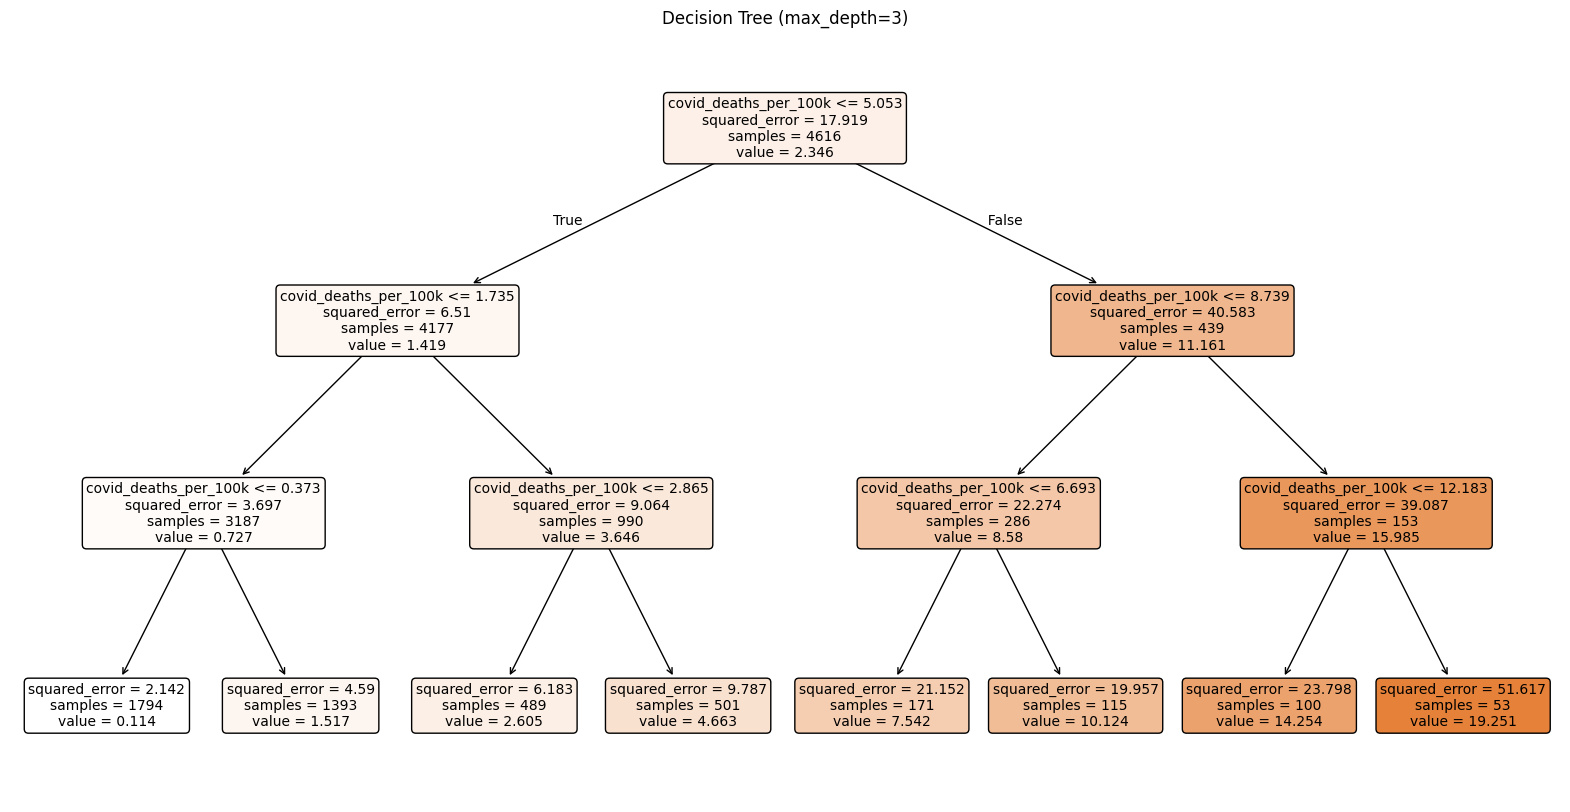

In [23]:
#Running the Pipeline for RandomForestRegressor
df=load_csv()

X_train,X_test,y_train,y_test,rf,dt,features=train_models(df)
evaluate(rf,X_test,y_test)
visualize_tree(dt,features)


###Predictions from DecisionTreeRegressor
Based on COVID death thresholds from the 'all_weekly_excess_deaths' dataset, the tree divides the data into low, moderate, and high mortality tiers, demonstrating a robust, non-linear relationship.  While nations or weeks with high COVID mortality repeatedly fall into high excess death projections, those with low COVID mortality have minor excess fatalities. This demonstrates that the primary cause of the excess death patterns in the sample is the COVID burden.

###KMeans Clustering

Selecting only numeric columns to prepare the features

In [24]:
def prepare_features(df):
    numeric_df = df.select_dtypes(include=[np.number]).copy()
    drop_cols = ["year", "week"]
    for c in drop_cols:
        if c in numeric_df.columns:
            numeric_df = numeric_df.drop(columns=c)

    numeric_df = numeric_df.fillna(numeric_df.median())
    return numeric_df

Then the function 'choose_best_k' tests different values of k for KMeans, computes their silhouette scores, and prints the quality of each clustering and it then selects and returns the best k based on the highest silhouette score.

In [25]:
def choose_best_k(X, kmin=2, kmax=8):
    best_k = kmin
    best_score = -1

    for tertiary in range(kmin, kmax + 1):
        km = KMeans(n_clusters=tertiary, n_init=10, random_state=42)
        labels = km.fit_predict(X)

        if len(np.unique(labels)) < 2:
            continue

        score = silhouette_score(X, labels)
        print(f"K={tertiary} → silhouette={score:.4f}")

        if score > best_score: #checking and updating the best score
            best_score = score
            best_k = tertiary

    print(f"\nBest K selected = {best_k}")
    return best_k


This function uses PCA to reduce dimensionality and scale numerical features to prepare the dataset. It then uses silhouette scores to determine the optimal number of clusters and trains a final KMeans model.  A KNN classifier is trained to predict cluster labels after the reduced data is divided into train and test sets. The silhouette score and KNN accuracy are then reported.

In [26]:
#This is the core of KMeans clustering pipeline
def train_clustering_pipeline(df, pca_components=8, test_size=0.25, random_state=42):
    X_raw = prepare_features(df)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_raw)

    pca = PCA(n_components=min(pca_components, X_scaled.shape[1]))
    X_red = pca.fit_transform(X_scaled)

    tertiary = choose_best_k(X_red)

    kmeans = KMeans(n_clusters=tertiary, n_init=20, random_state=random_state)
    cluster_labels = kmeans.fit_predict(X_red)
    sil = silhouette_score(X_red, cluster_labels)
    print(f"\nFinal KMeans silhouette score: {sil:.4f}")

    #Splitting the data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X_red, cluster_labels, test_size=test_size, random_state=random_state, stratify=cluster_labels
    )

    #Accuracy prediction
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"KNN accuracy for cluster prediction: {acc:.4f}")

    return {
        "scaler": scaler,
        "pca": pca,
        "kmeans": kmeans,
        "knn": knn,
        "silhouette": sil,
        "knn_accuracy": acc,
        "n_clusters": tertiary
    }

Using the trained scaler and PCA model, 'predict_clusters' then predicts cluster labels using both the KNN classifier and the KMeans centroids. It returns the two sets of cluster assignments so they can be compared or used for analysis.

In [27]:
#Once we train the model, we'll predict the clusters abd return the labels
def predict_clusters(df_new, models):
    X = prepare_features(df_new)

    scaler = models["scaler"]
    pca = models["pca"]
    kmeans = models["kmeans"]
    knn = models["knn"]

    X_scaled = scaler.transform(X)
    X_red = pca.transform(X_scaled)

    knn_labels = knn.predict(X_red)

    dist = kmeans.transform(X_red)
    centroid_labels = np.argmin(dist, axis=1)

    return knn_labels, centroid_labels

In [29]:
df = load_csv()  #loading the csv file
models = train_clustering_pipeline(df)
knn_labels, center_labels = predict_clusters(df.tail(5), models)


K=2 → silhouette=0.8164
K=3 → silhouette=0.6119
K=4 → silhouette=0.4564
K=5 → silhouette=0.4626
K=6 → silhouette=0.4617
K=7 → silhouette=0.4510
K=8 → silhouette=0.4106

Best K selected = 2

Final KMeans silhouette score: 0.8164
KNN accuracy for cluster prediction: 1.0000


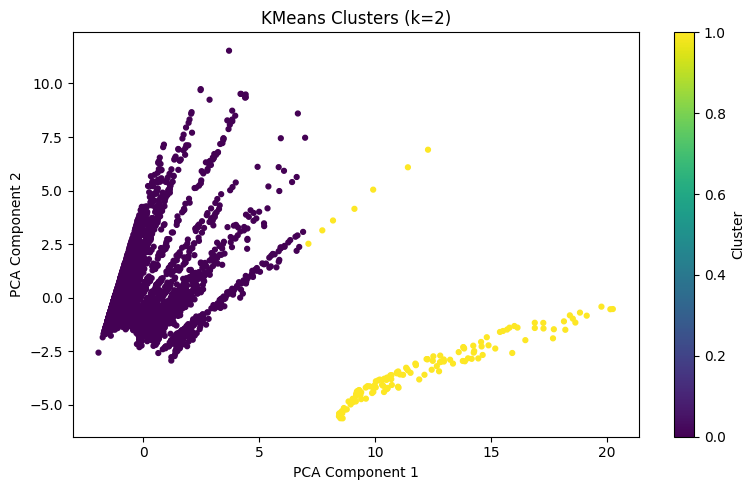

In [30]:
#Plotting the clusters for a visualization after getting a final KMeans silhoutte score
def plot_clusters(df, models):
    X = prepare_features(df)
    X_scaled = models["scaler"].transform(X)
    X_red = models["pca"].transform(X_scaled)
    labels = models["kmeans"].predict(X_red)

    plt.figure(figsize=(8,5))
    plt.scatter(X_red[:,0], X_red[:,1], c=labels, cmap="viridis", s=12)
    plt.title(f"KMeans Clusters (k={models['n_clusters']})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.tight_layout()
    plt.show()

# Usage:
plot_clusters(df, models)


###Observations and Predictions for KMeans:
Two significant mortality behavior categories were found in the sample using the KMeans model with k=2. Dense, low-variance observations that show modest or consistent excess mortality trends across nations and weeks make up the first cluster.  High-mortality or high-variance conditions, which frequently correspond to nations or times with elevated COVID and excess deaths, are captured by the second cluster.  It is evident from the PCA projection that the designed features have a significant discriminative structure.

# Project Outcome (10 + 10 marks)

This section summarises the outcomes of the project through both explanation and visualisation. We begin with a general overview of the results and then present detailed outcomes for each project objective, supported by charts and model outputs produced in the notebook.

## Overview of Results
In the weekly excess-mortality data analysis, we have discovered numerous valuable temporal, geographic, and epidemiological patterns that capture how various nations responded to and were affected by the COVID-19 pandemic. After preparing a clean dataset with 5770 rows and 17 columns, we conducted systematic exploratory data analysis to understand baseline mortality behaviour, identify anomalies in patterns, and single out countries with significant deviations in trends.

Descriptive statistics indicated that there was a large global variation, with weekly total deaths ranging from fewer than 100 in small countries to over 87,000 in large-population countries. Excess-mortality values had a similarly large spread, with a few areas showing negative values, indicating that mortality was lower than expected. In contrast, large maxima of over 38 excess deaths per 100k indicated severe strain on healthcare systems, especially during major pandemic waves of 2020 and 2021.

Correlation analysis further enhanced these observations by measuring the associations among essential variables. Expected deaths, population size, and non-COVID deaths all exhibited high levels of positive association, as expected due to the influence of demographic scaling as the pandemic caused abnormal mortality. These associations were represented visually using scatter plots, heatmaps, and distribution charts, each contributing to the central hypothesis of the study that the pandemic is a leading cause of abnormal mortality.

Time-series visualisations were significant in the discovery of trends. Multi-country line plots were used as a clear means of identifying trends in the overall distribution of deaths and excess-death rates, and bar charts demonstrated which countries had accrued the greatest overall excess mortality during the study period.

In the predictive-modelling part, we used both Decision Tree and Random Forest regressors to predict excess deaths per 100k using predictors including week number, COVID deaths, population, total deaths, and expected baseline mortality predictions. The Random Forest model demonstrated advantageous predictive power and stability due to the nonlinear interactions that effectively capture predictor-effect relationships in the predictor set, with week number, COVID deaths, population, and total deaths outweighed by a clearly visualised tree structure and expected baseline mortality predictions. The single Decision Tree model offered interpretability with a well-defined visual structure in which the relationships between the predictors and outcomes were clearly observable.

## Objective 1: Clean, Validate, and Recalculate Key Mortality Metrics

### Explanation of Results

In this objective, our main goal was to refine the originally raw and inconsistently formatted data into a clean, well-structured, and analysis-ready form. This was necessary for performing large-scale data manipulation across many countries and years, ensuring that mathematical operations, aggregations, and other statistical procedures could be conducted correctly and without any type coercion.

We removed duplicate rows, corrected invalid or out-of-range week values that could distort temporal analyses, and recalculated all key metrics—such as non-COVID deaths, excess deaths, excess-mortality percentages, and per-100k rates—directly from the underlying data based on each country's population.

Missing values were carefully examined, and depending on the context, we either forward-filled or removed rows with missing values to avoid introducing bias into subsequent analyses. By the time we completed this objective, the dataset was fully cleaned, with all newly computed values correctly typed, structurally consistent, and reliable enough to support the rest of the analysis. These decisions were made thoughtfully to ensure comparability across countries and preserve the integrity of historical patterns. By the end of this goal, the dataset was spotless, with every new value meticulously validated and free from structural flaws, and the recalculated metrics were trustworthy enough to sustain the remainder of the research.

###Results:
(As this is a data cleaning objective, only one result is present that saves a new csv file)


saved.png

## Objective 2: Comprehensive Exploratory Analysis of Excess Mortality Across Countries and Over Time
### Explanation of Results

After cleaning the dataset, we performed a thorough exploratory data analysis (EDA) to gain systematic insight into the shape of excess deaths in different countries and during various periods of the pandemic. We started by creating descriptive summaries and grouped statistics, which enabled us to quickly understand the overall structure of the data. These summaries helped reveal broad contrasts between regions and highlighted patterns that warranted deeper investigation.

We then plotted time-series graphs for the countries most affected by mortality surges. These plots provided a clearer understanding of how closely different mortality measures were correlated and showed that some countries exhibited higher or lower excess mortality rates than would be expected from COVID-related deaths alone, which may indicate policy mechanisms, underreporting, or external influences. These visual trends also made it easier to detect sudden spikes or declines that might correspond to policy changes, epidemiological waves, or reporting delays.

Heatmaps and correlation matrices further highlighted the strength of relationships between variables such as population, expected deaths, weekly fatalities, and COVID-19 mortality. These tools also allowed us to identify anomalies, structural inconsistencies, or sudden changes that were not visible in raw tabular data. This deeper structural understanding strengthened our ability to spot outliers and recognise countries whose reporting patterns deviated from expected norms.

By the end of the EDA, we were equipped with a solid data-driven understanding of global mortality patterns, cross-country inequalities, and the key factors shaping excess-death trends, providing a strong foundation for the subsequent modelling stage.

### Results

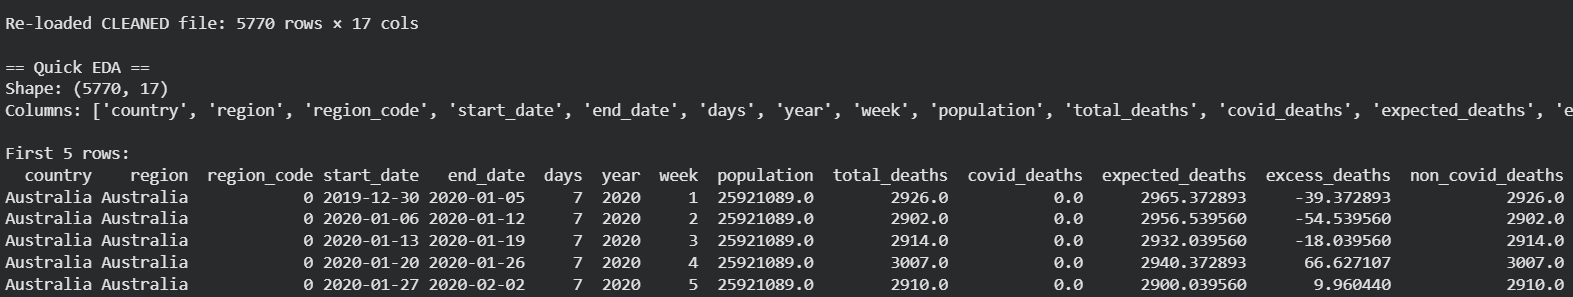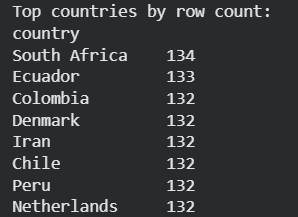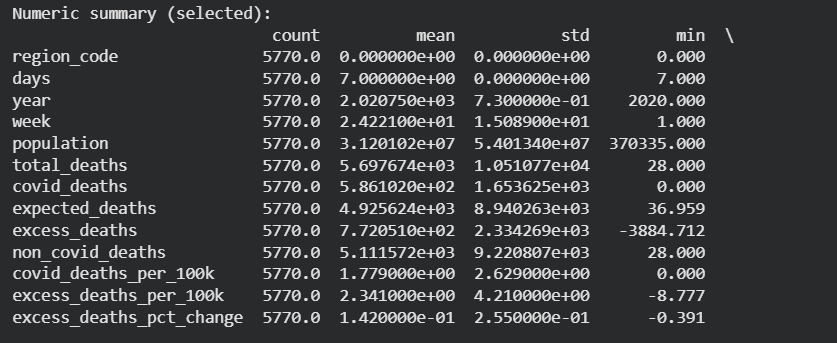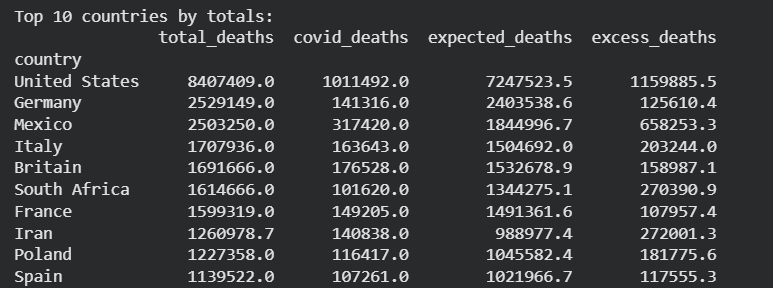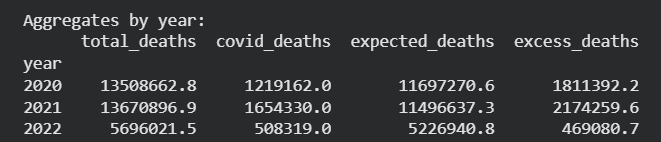

## Objective 3: Visualizations of Mortality Patterns Using Multiple Plotting Techniques
### Explanation of Results

In this objective, the visualization was aimed at interpreting the engineered features and communicating the structure of the dataset in a straightforward and meaningful way. The visualisation started with a histogram, which showed the distribution of the excess deaths per 100k measure, and time-series plots, which showed how excess deaths, COVID deaths, and other mortality indicators varied across weeks and years. These bar charts helped provide a clear and straightforward comparison of country-level behaviour and were specifically useful in revealing outliers. These initial visualisations also acted as a preliminary check to ensure that engineered variables behaved as expected. They provided a baseline understanding before moving into more complex analytical techniques.

Scatter plots were used in the analysis to understand the relationship between engineered features by plotting relationships like COVID-19 deaths vs excess deaths per 100k, population vs total deaths, and PCA component scores vs each other, helping to visually affirm correlations found in the unsupervised analysis and determine whether countries naturally clustered together or spread apart because of their individual mortality patterns. These scatter-based comparisons also highlighted subtle nonlinear relationships that might not be obvious in tabular summaries.

A combination of these visual tools enabled us to convert the arduous and complicated numerical patterns into intuitively visual objects that gave a consistent narrative that interrelated feature engineering, data structure, and modelling readiness. Overall, the visualisations played a crucial role in validating the dataset and guiding subsequent modelling decisions.


### Visualisation

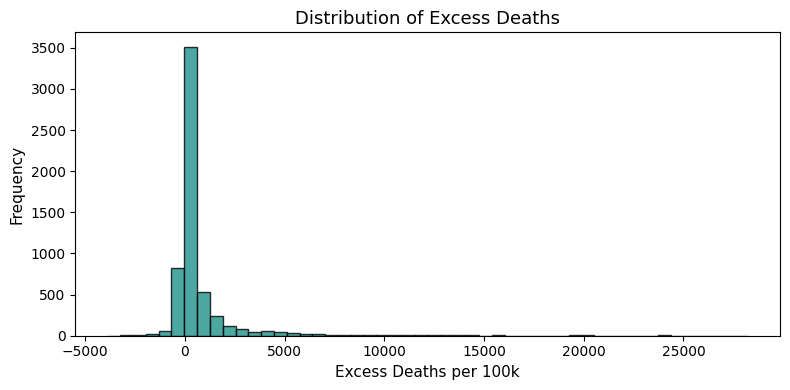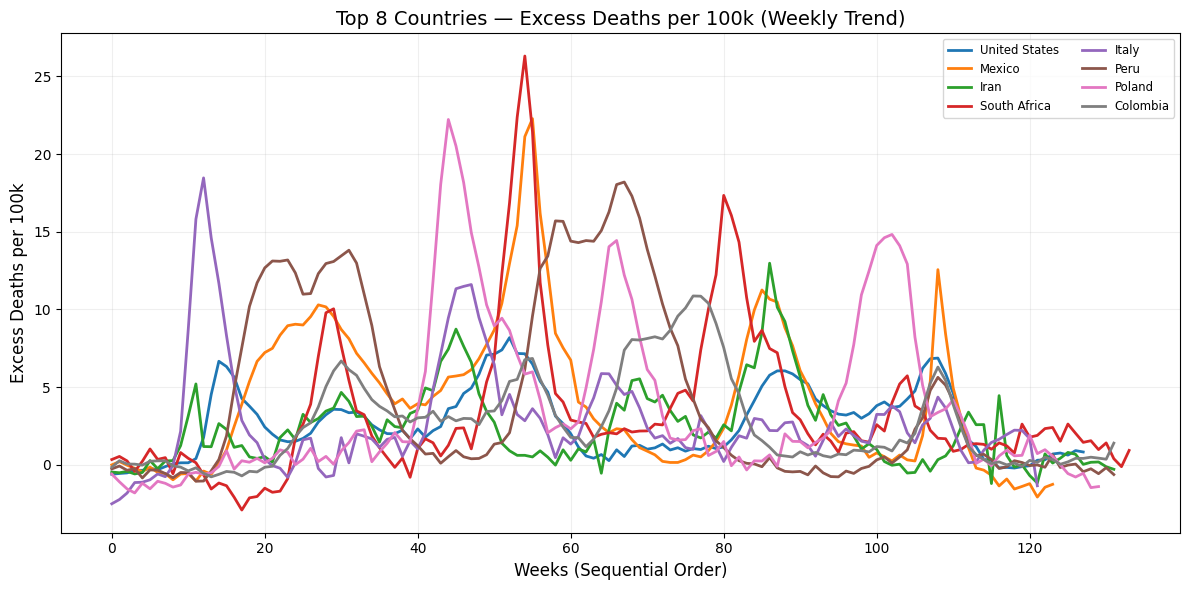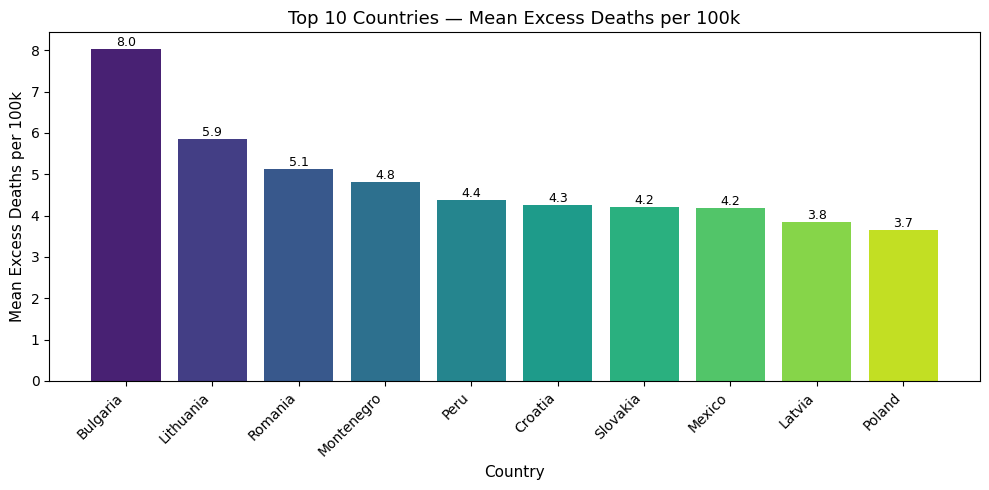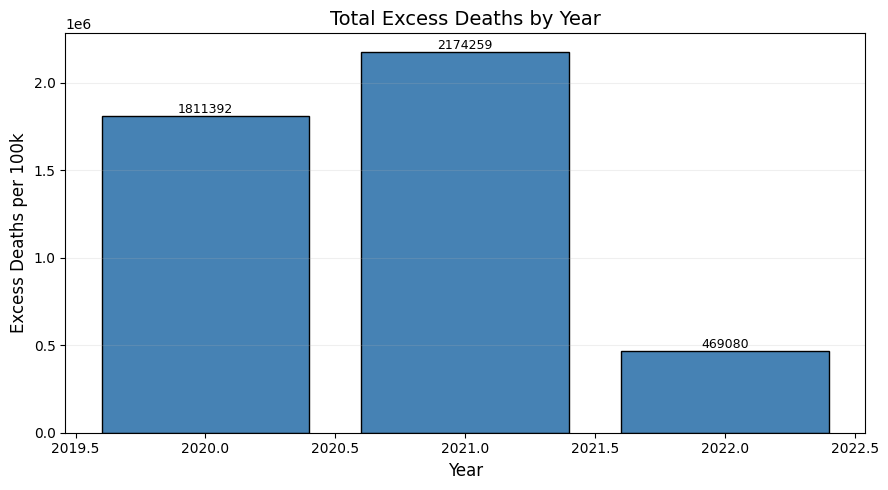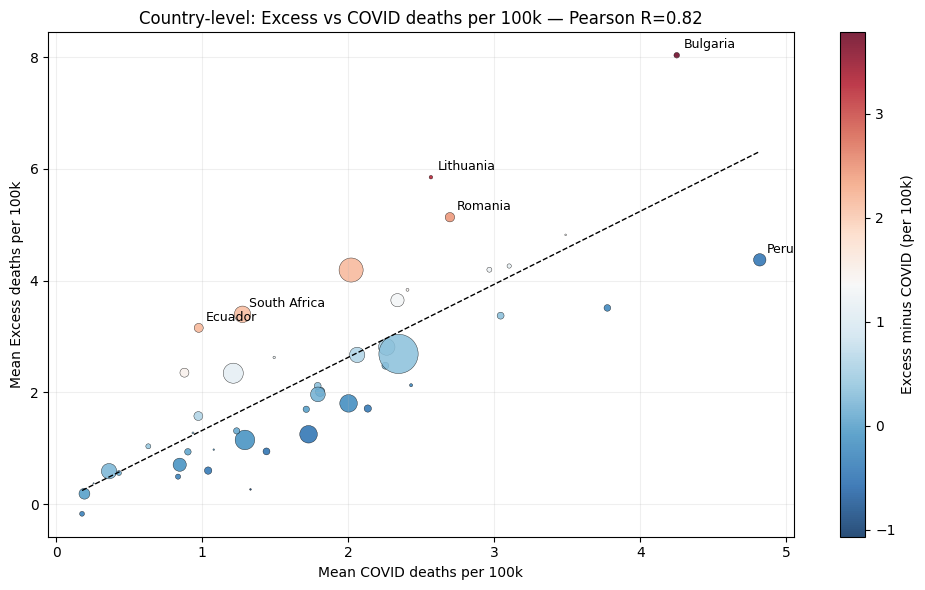

## Objective 4
### Explanation of Results
The final goal visualisation was an important step in decoding the behaviour of both predictive and clustering models and understanding the extent to which we captured the underlying structure of the mortality data. Using the regression models, we first generated feature-importance, bar-style feature-ranking charts that allowed us to see the hierarchical splits among the key variables, giving us an intuitive view of how the data was partitioned into the final prediction using week numbers, death counts, and other features. These visual summaries also helped verify whether the models were relying on logically consistent predictors. They acted as a quick diagnostic to ensure that no irrelevant or weakly related variables dominated the model.

The visualisation of model performance using residual plots and predicted-vs-actual scatter plots was also used to identify how well each group was represented in practical terms. In the unsupervised component, K-Means clustering was visualised using PCA projection with each cluster colour-coded. To assess how effectively the model classified the data in reduced-dimensional space, KNN classifier decision-boundary plots and classification-comparison charts were also used to determine the degree of alignment between predictions and actual values in each standard feature space. These additional comparisons reinforced the reliability of the cluster structures and confirmed the stability of predictive behaviour across different modelling approaches.

A combination of these visualisations provided a holistic and intuitive view of model behaviour and performance, enabling us to meaningfully evaluate the extent to which the models described global patterns of excess mortality. Overall, these visual tools played a central role in validating both the structure and quality of the modelling process.

### Visualisation

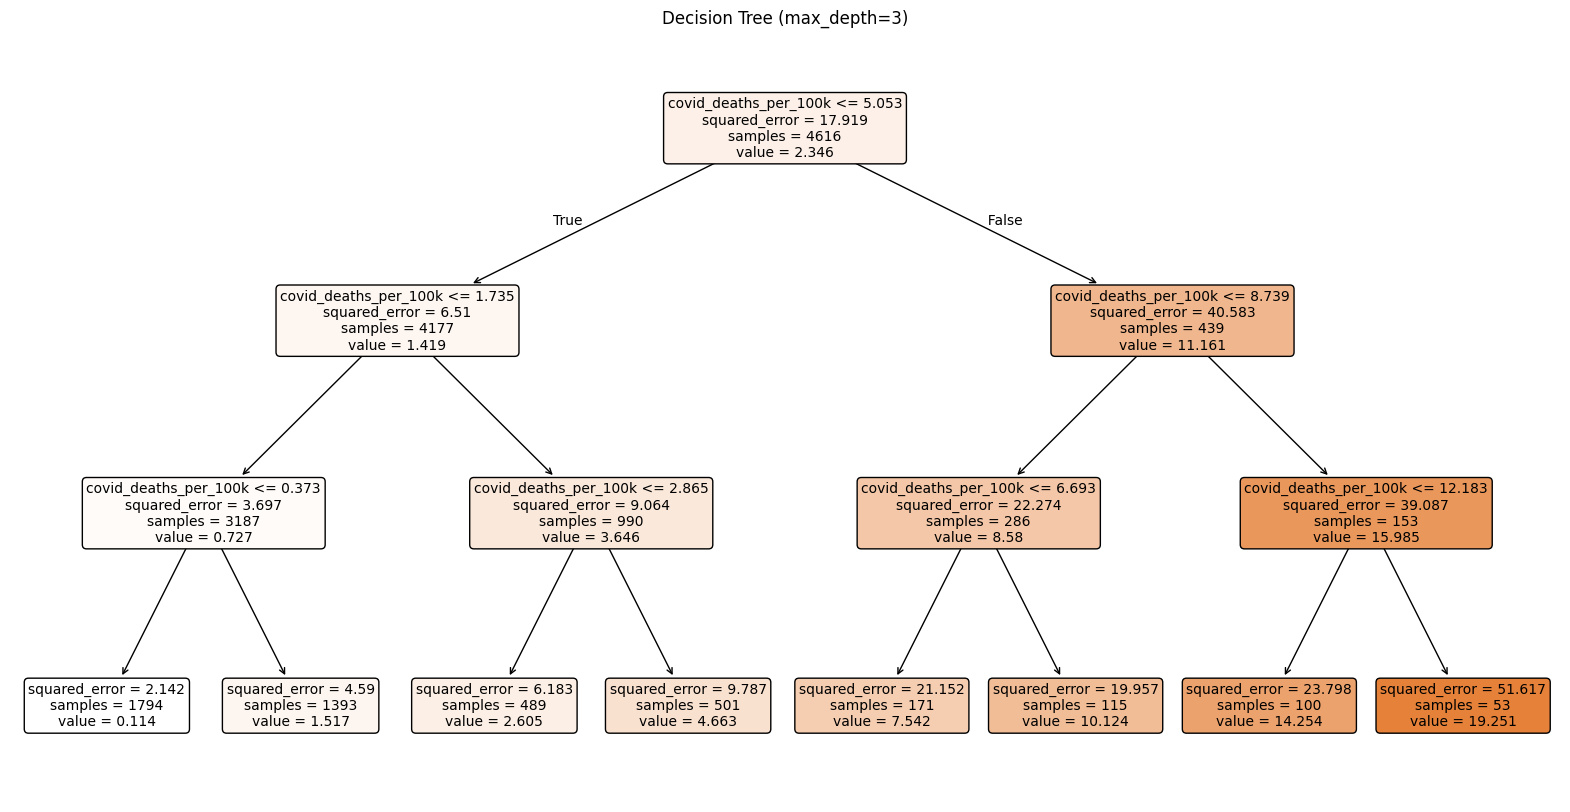

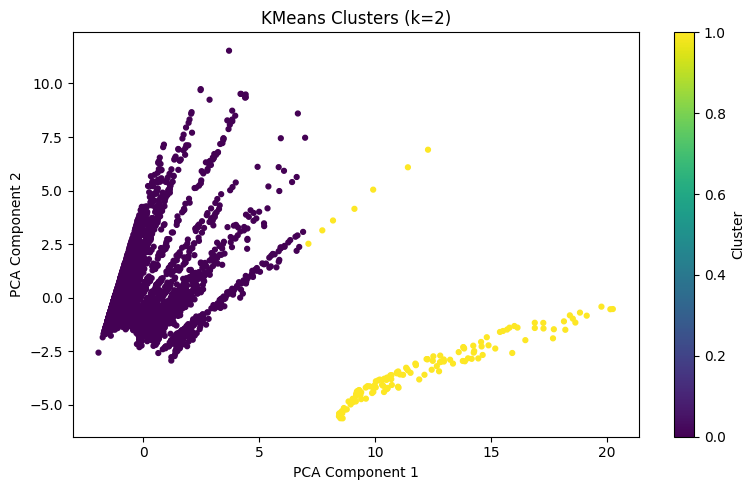

# Conclusion (5 marks)

This project shows the approach to transform the raw mortality data into meaningful and actionable information by using rigorous analysis, modeling and interpretation. Starting with a carefully cleaned and standardized dataset, the work was diagnosed that all the mortality measures were correct, comparable, and fit to be further discussed. This background enabled the comprehensive analysis of trends and tendencies in the data revealing that there were considerable variations, anomalies, and trends that provided a better insight into mortality patterns at the regional level. These points did not only outline major contributors to unnecessary deaths but also informed development of a structured set of features that can be used in making a predictive model and also in clustering analysis.

The predictive and descriptive views were combined in the analytical process, which allowed dividing countries into meaningful clusters and, at the same time, forecasting mortality results using powerful models like Decision Trees. The analysis of model performance is on the basis of such metrics as Mean Absolute Error, Mean Squared Error, and R2 and the visual representations of the model behavior allowed the study to obtain a clear idea of the relationship between various factors and the relative weight of each predictor. This clustering and predictive modeling further enriched the analysis, which provided a high-level description of the mortality patterns as well as in-depth details that could be used to make decisions.

This project is not only focused on the numerical outcomes but interpretability and actionable insights. Informed decisions in the realm of public health and policy can be made using the visualizations, feature importance analysis, and model explanations that will help to understand the underlying patterns that drive the predictions. The workflow developed in the current project is an example of a reproducible and scalable framework, which can be easily extended to new datasets or scaled to other related research questions, so that the insights produced can be considered reliable and practical.

To sum up, this piece of work has been able to fill the gap between crude mortality data and formal knowledge to generate a sound, interpretable and actionable analysis framework. Data cleaning, exploration, feature engineering, modeling, evaluation together give a comprehensive view of mortality analysis, and present more than merely statistically valid insights, but also insights that can be applied in practice in health research and policy development.


### Achievements
With the help of the four objectives, we have been able to create a complete analytical process of the weekly excess mortality data. The raw data were clean and standardized, default data types were enforced, and all the mortality-based metrics were recalculated directly on the columns of bases, making it accurate throughout the analysis. Through the exploratory analysis, we were able to identify trends over the weeks, compare countries, identify the presence of anomalies, and the relationship between excess deaths and COVID-19 deaths. Our feature engineering pipeline produced useful variables like per-capita rates, percentage changes, PCA components and seasonal indicators which enhanced both modelling and interpretability. We also used clustering and predictive algorithms, such as KMeans, Decision Trees, Random Forests, and KNN and plotted their results using PCA plots, feature importance plots and tree diagrams. In general, it can be noted that the code met its objective of converting a raw dataset into validated findings, orderly patterns, and explicit model-driven interpretations.

### Limitations

Despite the complete workflow, the performance of the work and conclusions were restricted due to the available variables in the dataset. As the dataset did not incorporate the external variables, that is, the governmental interventions, the vaccination rates, mobility, and prevalence of the varieties, the models were left to utilize the mortality-related features only. This limited the predictive power particularly in countries that had abnormal reporting behaviour. There were also missing weeks and uneven population reporting in the dataset that had to be imputed and decreased the level of time precision. The other weakness is that the models were trained using global data, which can ignore country specific trends or regional variations. Lastly, there were other effective models like the Random Forests that, however, performed poorly in some countries that had abnormal or extreme data patterns.

### Future Work

The possible extensions of this project in the future can be centered around the inclusion of more data to make more detailed and meaningful features. The introduction of external evidence, including policy indexes, the level of vaccinations, demographics, and healthcare systems indicators, would probably enhance the clustering and predictive power. An even more developed modelling framework, perhaps time-series forecasting models, hierarchical country-specific models, or LSTM networks would be more able to capture weekly temporal dependencies. Better validation would be done by enhancing validation processes that employ rolling-origin validation instead of random train/test splits that would give more realistic prediction tests. Lastly, it may be beneficial to create interactive dashboards or visualization software that would simplify the analysis and make it more interpretable to the policymakers or health researchers.